# CS 506 HW1 Solution
Name: Jimmy Rao

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc
import csv

from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++')
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance
import time

### 1. Understandking K-means Clustering

(Please fill out the functions in k_means_clustering.py)

### 2. Working with the Algorithms

In [4]:
from typing import List, Dict, Tuple

# feel free to add more functions such as discard missing examples

def read_dataset(dataset_path: str):
    """
    read in NYC dataset and return a dataset type of your choice
    :param dataset_path: the string path to the dataset file
    :return: dataset
    """
    with open(dataset_path, 'r') as file:
  # read the file as a dictionary for each row ({header : value})
        reader = csv.DictReader(file)
        data = {}
        for row in reader:
            for header, value in row.items():
                try:
                    data[header].append(value)
                except KeyError:
                    data[header] = [value]

    # extract the variables and change them to floats
    price = [float(x[1:].replace(',',"")) for x in data['price']]
    latitude = [float(x) for x in data['latitude']]
    longitude = [float(x) for x in data['longitude']]

    #testing 
    data = np.array(list(zip(latitude,longitude,price)))
    return data


def cluster_nyc_listings(data):
    """
    cluster AirBnb listings using k-means++, hierarchical, and GMM
    :return: 
    """
    #K-means
    kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_
    print('k-means++:', kmeans.cluster_centers_, '\n')
    
    #Hierarchical
    hierarchical = hierarchy.linkage(data, method = 'complete')
    print('hierarchical:',hierarchical, '\n' )
    
    #GMM
    gm = GaussianMixture(n_components=3, random_state=0).fit(data)
    print('gaussian:', gm.means_)
    
    pass


In [5]:
data = read_dataset('nyc_listings.csv')
print(data)

[[ 40.75356    -73.98559    150.        ]
 [ 40.68494    -73.95765     75.        ]
 [ 40.68535    -73.95512     60.        ]
 ...
 [ 40.76894987 -73.96045537  63.        ]
 [ 40.59925734 -73.79795321  75.        ]
 [ 40.74865509 -73.98120875 115.        ]]


In [ ]:
cluster_nyc_listings(data)

k-means++: [[  40.73077973  -73.96405465  205.01967056]
 [  40.733622    -73.95966667 9932.26666667]
 [  40.73229079  -73.9665239  1611.87301587]
 [  40.72763207  -73.93461544   60.81575135]
 [  40.73400784  -73.97042088  544.53099415]
 [  40.71523571  -73.97175286 5958.71428571]
 [  40.74669897  -73.96803675 2871.13953488]
 [  40.7340756   -73.96868088  331.31149425]
 [  40.72902728  -73.95466748  124.44870994]
 [  40.73800629  -73.97042453  928.98099762]] 

hierarchical: [[9.4880e+03 9.5440e+03 0.0000e+00 2.0000e+00]
 [1.0708e+04 3.6724e+04 0.0000e+00 3.0000e+00]
 [2.5000e+01 3.6800e+02 0.0000e+00 2.0000e+00]
 ...
 [7.3441e+04 7.3443e+04 4.0000e+03 3.6695e+04]
 [7.3437e+04 7.3442e+04 5.0000e+03 2.9000e+01]
 [7.3444e+04 7.3445e+04 1.0000e+04 3.6724e+04]] 

gaussian: [[ 40.72891652 -73.9443289   90.8594587 ]
 [ 40.70383991 -73.88146015 593.09578965]
 [ 40.73615111 -73.97747709 227.91200768]]


### K-means: 
I decided to use K = 10 clusters because after using the elbow method, I saw that the trendline started to bottom out. 

### Hierarchical:
I decided to use complete-linkage clustering because it produces more-balanced clusters and is less susceptible to noise. Below you'll see I chose 14 clusters. I did that because the Silhouette Scores started high but flattened out at K=14. I tested lower K levels, but generally anything less than 14 seemed not show many differences in clusters on the map. 

### GMM: 
I decided on three clusters because the silhouette score was highest when K = 3. 


### 2b List a few bullet points describing the pros and cons of the various clustering algorithms.

## K-means++ 
### Pros:
- Ease of implementation
- Efficient (Good time complexity)
- Can be used in large data sets 
- Ease of interpretation 

### Cons: 
- Tries to find spherical clusters and equal-sized clusters 
- Sensitive to the starting cluster 
- Lacks consistency 

## Hierarchical
### Pros:
- Encodes many different clusterings, we do not need to specify the number of clusters
- Dendogram may correspond to meaningful structure 
- Can be performed using either similarity or dissimilarity metrics 

### Cons: 
- Does not work well on large data set 
- Computationally heavy and takes longer to run 

## Gaussian Mixture Models
### Pros:
- It is very fast 
- As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

### Cons: 
- When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
- will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.





### 3 Data Visualization
### 3a Produce a Heatmap. Is this heatmap useful in order to draw conclusions about the expensiveness of areas within NYC? if not, why?

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from IPython.display import display

df = pd.read_csv ('nyc_listings.csv')
# df = df[["latitude", "longitude", "price"]]
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype('float')

def generate_base_map(default_location: Tuple[float, float]=[40.693943, -73.985880]):
    base_map = folium.Map(location=default_location)
    return base_map
                      
base_map = generate_base_map()
HeatMap(
    data=df[["latitude", "longitude", "price"]]
    .groupby(["latitude", "longitude"])
    .mean()
    .reset_index()
    .values.tolist(),
    radius=8,
    max_zoom=13,
).add_to(base_map)
base_map.save("index.html")

display(base_map)
                      

This heatmap is useful, but it is most useful in Manhatten because you can see clear areas (clusters) that are more expensive than the rest of the surrounding area. 

### 3b Visualize the clusters by plotting the longitude / lattitude of every listings in a scatter plot

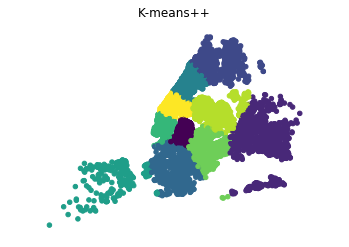

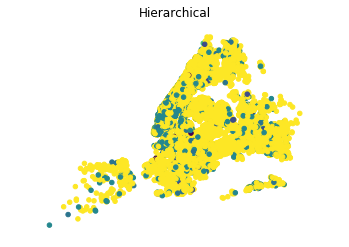

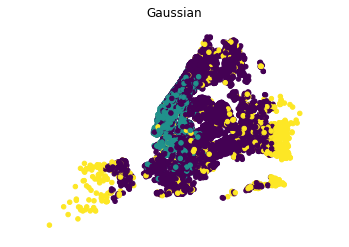

In [ ]:
def visualize_clusters(df):

# K-means++
    kmeans = KMeans(n_clusters=10, random_state=0)
    y_k = kmeans.fit_predict(df[['longitude', 'latitude']])
    df['label'] = y_k
    df.plot('longitude', 'latitude', kind = 'scatter', c = 'label', colormap='viridis', colorbar = False)
    plt.title('K-means++')
    plt.axis('equal')
    plt.axis('off');
    
# Hierarchical
    hc = AgglomerativeClustering(n_clusters = 14, affinity = 'euclidean', linkage = 'complete') 
    y_hc = hc.fit_predict(df[["latitude", "longitude", "price"]])
    df['label'] = y_hc
    df.plot('longitude', 'latitude', kind = 'scatter', c = 'label', colormap='viridis', colorbar = False)
    plt.title('Hierarchical')
    plt.axis('equal')
    plt.axis('off');
    
# Gaussian
    gmm =GaussianMixture(n_components=3, covariance_type='diag')
    y_gmm = gmm.fit_predict(df[["latitude", "longitude", "price"]])
    df['label'] = y_gmm
    df.plot('longitude', 'latitude', kind = 'scatter', c = 'label', colormap='viridis', colorbar = False)
    plt.title('Gaussian')
    plt.axis('equal')
    plt.axis('off');
    
    return y_k, y_hc, y_gmm
    
three_clusters = visualize_clusters(df)

### 3c For every cluster, report the average price of the listings within this cluster

In [ ]:
print('K_means')
k_df = df.loc[:,['price']]
k_df['cluster'] = three_clusters[0].tolist()
k_df.groupby('cluster').mean() 

K_means


,price
cluster,
0,138.850051
1,132.260475
2,99.536205
3,136.815242
4,131.701404
5,118.477541
6,230.726683
7,107.729551
8,98.702929


In [ ]:
print('Hierarchical')
k_df = df.loc[:,['price']]
k_df['cluster'] = three_clusters[1].tolist()
k_df.groupby('cluster').mean() 

Hierarchical


,price
cluster,
0,1563.850000
1,6224.571429
2,3683.375000
3,1044.932075
4,2066.482759
5,698.563674
6,317.468989
7,9998.857143
8,7157.000000


In [ ]:
print('Gaussian')
k_df = df.loc[:,['price']]
k_df['cluster'] = three_clusters[2].tolist()
k_df.groupby('cluster').mean() 

Gaussian


,price
cluster,
0,82.984402
1,228.092323
2,734.788515


### 3d Bonus point (provide a plot on an actual NYC map)

### 3e Are the findings in agreement with what you have in mind about the cost of living for neighborhoods in NYC? If you are unfamiliar with NYC, you can consult the web.

I'd say the the findings in the gaussian clustering visual is what I had in mind for neighborhoods in NYC. The closer to Manhatten, the more expensive. That cluster looks the most realistic and clear. 

### 4. Image Manipulation

In [39]:
# You need to add more functions here

import cv2

def display_image(image):
    cv2.imshow("Display Window", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def cluster_image(image_path: str):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    units = image.shape
    data = image / 255.0 # use 0...1 scale
    data = data.reshape(units[0] * units[1], units[2])  # collapse height x width
    k = 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = new_colors.reshape(image.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(recolored)
    ax[1].set_title(str(k) + '-color Image', size=16);
    pass


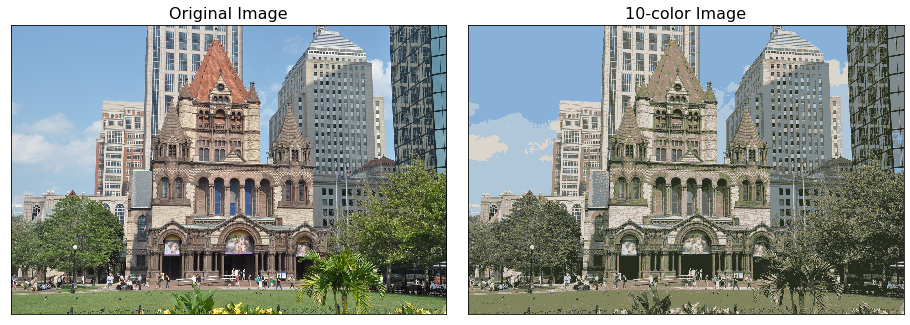

In [40]:
cluster_image("test.jpg")

# Extras

## Silhouette Score For Hierarchical 

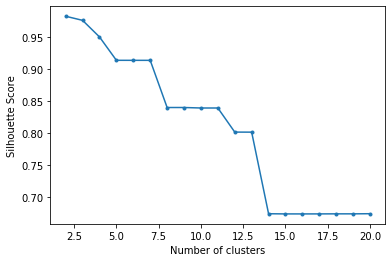

In [ ]:
max_clusters = 20
s = np.zeros(max_clusters+1)
for k in range(2, max_clusters+1):
    clusters = hierarchy.fcluster(hierarchical, k, criterion = 'maxclust')
    s[k] = metrics.silhouette_score(data, clusters, metric = 'euclidean')
plt.plot(range(2, len(s)), s[2:], '.-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

# Visualization of color manipulation for picture

In [19]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

In [41]:
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
data = image / 255.0 # use 0...1 scale
data = data.reshape(850 * 1280, 3)  # collapse height x width
data.shape

(1088000, 3)

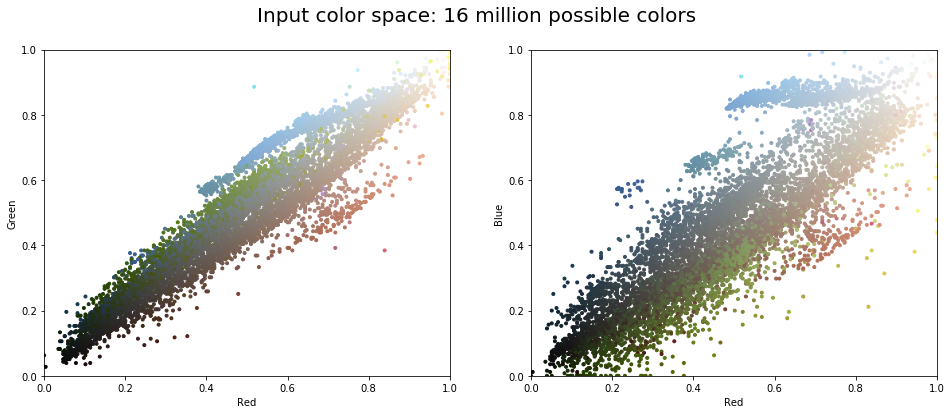

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [27]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

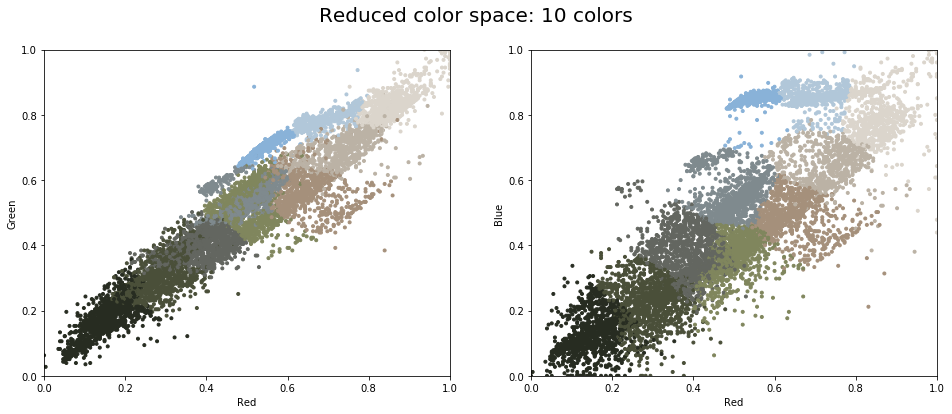

In [28]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 10 colors")